# Project Overview


## Problem Statement
The goal of this project is to use various factors to predict obesity risk in individuals, which is related to cardiovascular disease

## Data Description

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)
variables obtained :
Gender, Age, Height and Weight.

NObesity values are:

- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40**


## Project Outline
1. **Data Exploration and Preprocessing**: Understand the data, clean missing values, and prepare it for modeling.
2. **Model Building**: Train and evaluate multiple models to find the best performing one.
3. **Model Optimization**: Fine-tune the models using hyperparameter tuning techniques.
4. **Results and Insights**: Summarize the findings and present the final model's performance.



In [ ]:
numpy
tensorflow
sklearn
xgboost
pandas

In [1]:
# Import all needed modules and libraries here
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier,  ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import random
from collections import Counter
from itertools import chain
import time
import os
import pickle
from IPython.display import Image
import matplotlib.pyplot as plt
import bokeh
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.layouts import gridplot
import seaborn as sns
import warnings
import itertools
# Suppress all warnings
warnings.filterwarnings('ignore')

# 1. Data Exploration and Preprocessing

## Overview
In this section, we will explore the dataset to gain insights and understand the data distribution, identify any patterns or anomalies, and prepare the data for modeling. This step is crucial as it helps in cleaning the data, handling missing values, and transforming the data into a format that can be efficiently used by machine learning algorithms.

## Objectives
- **Data Exploration**: Perform an initial exploration of the dataset to understand the structure, identify missing values, and detect any outliers.
- **Data Cleaning**: Handle missing values, remove duplicates, and correct inconsistencies in the data.
- **Data Transformation**: Scale or normalize data as needed, and encode categorical variables for use in machine learning models.

## Key Steps

- 1. **Load the Data**: Import the dataset and examine the first few rows to get an initial sense of the data.
- 2. **Summary Statistics**: Generate summary statistics to understand the distribution of numerical features.
- 3. **Missing Values**: Identify missing values and decide on an appropriate strategy (e.g., imputation, removal).
- 4. **Outliers Detection**: Detect and handle any outliers that may affect model performance.
- 5. **Feature Selection**: Create new features or modify existing ones to add value to the dataset.
- 6. **Data Encoding**: Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.
- 7. **Scaling and Normalization**: Apply scaling methods such as Min-Max Scaling or Standardization to numerical features.

By the end of this section, the data will be cleaned, transformed, and ready for modeling.

---

In [16]:
# Load the data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
original_data = pd.read_csv('data/ObesityDataSet.csv')
train=train.drop(columns=['id'])
test=test.drop(columns=['id'])


In [152]:
# Display the first few rows of the training dataset
train.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight


In [153]:
# Shape of the data
print(f'The Train dataset has {train.shape[0]} rows and {train.shape[1]} columns')
print(f'The Test dataset has {test.shape[0]} rows and {test.shape[1]} columns')
print(f'The Original dataset has {original_data.shape[0]} rows and {original_data.shape[1]} columns')

The Train dataset has 20758 rows and 17 columns
The Test dataset has 13840 rows and 16 columns
The Original dataset has 2111 rows and 17 columns


In [17]:
# Rename columns to more intuive names

# Create dict with new names (key=old name, value=new name). 
columns_rename_map={'id':'id',
                    'Gender':'gender', 
                    'Age':'age',
                    'Height':'height',
                    'Weight':'weight',
                    'family_history_with_overweight':'fam_hist_ow',
                    'FAVC':'high_junk_food',
                    'FCVC':'freq_veg',
                    'NCP':'num_main_meal',
                    'CAEC':'freq_snack',
                    'SMOKE':'smoke',
                    'CH2O':'freq_water',
                    'SCC':'cal_track',
                    'FAF':'freq_exercise',
                    'TUE':'screen_time',
                    'CALC':'freq_alcohol',
                    'MTRANS':'transportation_type',
                    'NObeyesdad':'obesity_level'
    }

# Renaming columns
train.rename(columns=columns_rename_map, inplace=True)
test.rename(columns=columns_rename_map, inplace=True)
original_data.rename(columns=columns_rename_map, inplace=True)

In [18]:
# Appriviate lengthy categories for better plots later
# Appreviate the obesity levels lables
obesity_col_map={'Overweight_Level_II':'OW2', 'Normal_Weight':'NW', 'Insufficient_Weight':"UW",
       'Obesity_Type_III':'Ob3', 'Obesity_Type_II':'Ob2', 'Overweight_Level_I':'OW1',
       'Obesity_Type_I':'Ob1'}
train['obesity_level']= train['obesity_level'].map(obesity_col_map)
test['obesity_level']= train['obesity_level'].map(obesity_col_map)
original_data['obesity_level']= train['obesity_level'].map(obesity_col_map)

# Appreviate the transportation lables
train['transportation_type']=train['transportation_type'].map(lambda x: 'Public_T' if x == 'Public_Transportation' else x)
test['transportation_type']=train['transportation_type'].map(lambda x: 'Public_T' if x == 'Public_Transportation' else x)
original_data['transportation_type']=train['transportation_type'].map(lambda x: 'Public_T' if x == 'Public_Transportation' else x)

In [19]:
# Identify categorical and numerical columns
categorical_columns = list(train.select_dtypes(include=['object', 'category']).columns)
numerical_columns = list(train.select_dtypes(include=['int64', 'float64']).columns)
print(categorical_columns)
print(numerical_columns)

['gender', 'fam_hist_ow', 'high_junk_food', 'freq_snack', 'smoke', 'cal_track', 'freq_alcohol', 'transportation_type', 'obesity_level']
['age', 'height', 'weight', 'freq_veg', 'num_main_meal', 'freq_water', 'freq_exercise', 'screen_time']


In [20]:
# Display unique values of each categorical column to check for ordinal nature
categories={}
for col in categorical_columns:
    categories[col]=train[col].unique()
    print(f"{col}: {categories[col]}")

gender: ['Male' 'Female']
fam_hist_ow: ['yes' 'no']
high_junk_food: ['yes' 'no']
freq_snack: ['Sometimes' 'Frequently' 'no' 'Always']
smoke: ['no' 'yes']
cal_track: ['no' 'yes']
freq_alcohol: ['Sometimes' 'no' 'Frequently']
transportation_type: ['Public_T' 'Automobile' 'Walking' 'Motorbike' 'Bike']
obesity_level: ['OW2' 'NW' 'UW' 'Ob3' 'Ob2' 'OW1' 'Ob1']


In [21]:
# Identify ordninal and non-ordinal categoricagal columns
non_ordinal_cat_columns = ['gender', 'fam_hist_ow', 'high_junk_food', 'smoke', 'cal_track', 'transportation_type']
ordinal_cat_columns = ['freq_snack','freq_alcohol','obesity_level']

In [7]:
# Chage order of categories for ordinal categories
train['obesity_level'] = pd.Categorical(train['obesity_level'], categories=['UW','NW','OW1','OW2','Ob1', 'Ob2', 'Ob3'],ordered=True)
train['freq_alcohol'] = pd.Categorical(train['freq_alcohol'], categories=['no','Sometimes','Frequently'],ordered=True)
train['freq_snack'] = pd.Categorical(train['freq_snack'], categories=['no','Sometimes','Frequently','Always'],ordered=True)

# Verify the changes
print(train['obesity_level'].unique())
print(train['freq_snack'].unique())
print(train['freq_alcohol'].unique())

['OW2', 'NW', 'UW', 'Ob3', 'Ob2', 'OW1', 'Ob1']
Categories (7, object): ['UW' < 'NW' < 'OW1' < 'OW2' < 'Ob1' < 'Ob2' < 'Ob3']
['Sometimes', 'Frequently', 'no', 'Always']
Categories (4, object): ['no' < 'Sometimes' < 'Frequently' < 'Always']
['Sometimes', 'no', 'Frequently']
Categories (3, object): ['no' < 'Sometimes' < 'Frequently']


In [233]:
# Check for missing values in the train dataset
train.isnull().sum()

gender                 0
age                    0
height                 0
weight                 0
fam_hist_ow            0
high_junk_food         0
freq_veg               0
num_main_meal          0
freq_snack             0
smoke                  0
freq_water             0
cal_track              0
freq_exercise          0
screen_time            0
freq_alcohol           0
transportation_type    0
obesity_level          0
dtype: int64

In [234]:
# Check for missing values in the test dataset
test.isnull().sum()

gender                     0
age                        0
height                     0
weight                     0
fam_hist_ow                0
high_junk_food             0
freq_veg                   0
num_main_meal              0
freq_snack                 0
smoke                      0
freq_water                 0
cal_track                  0
freq_exercise              0
screen_time                0
freq_alcohol               0
transportation_type        0
obesity_level          13840
dtype: int64

In [235]:
# Check for missing values in the original dataset
original_data.isnull().sum()

gender                    0
age                       0
height                    0
weight                    0
fam_hist_ow               0
high_junk_food            0
freq_veg                  0
num_main_meal             0
freq_snack                0
smoke                     0
freq_water                0
cal_track                 0
freq_exercise             0
screen_time               0
freq_alcohol              0
transportation_type       0
obesity_level          2111
dtype: int64

In [236]:
# Display summary statistics of the numerical features
desc=train.describe()
desc.T

,count,mean,std,min,25%,50%,75%,max
age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
freq_veg,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
num_main_meal,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
freq_water,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
freq_exercise,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
screen_time,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


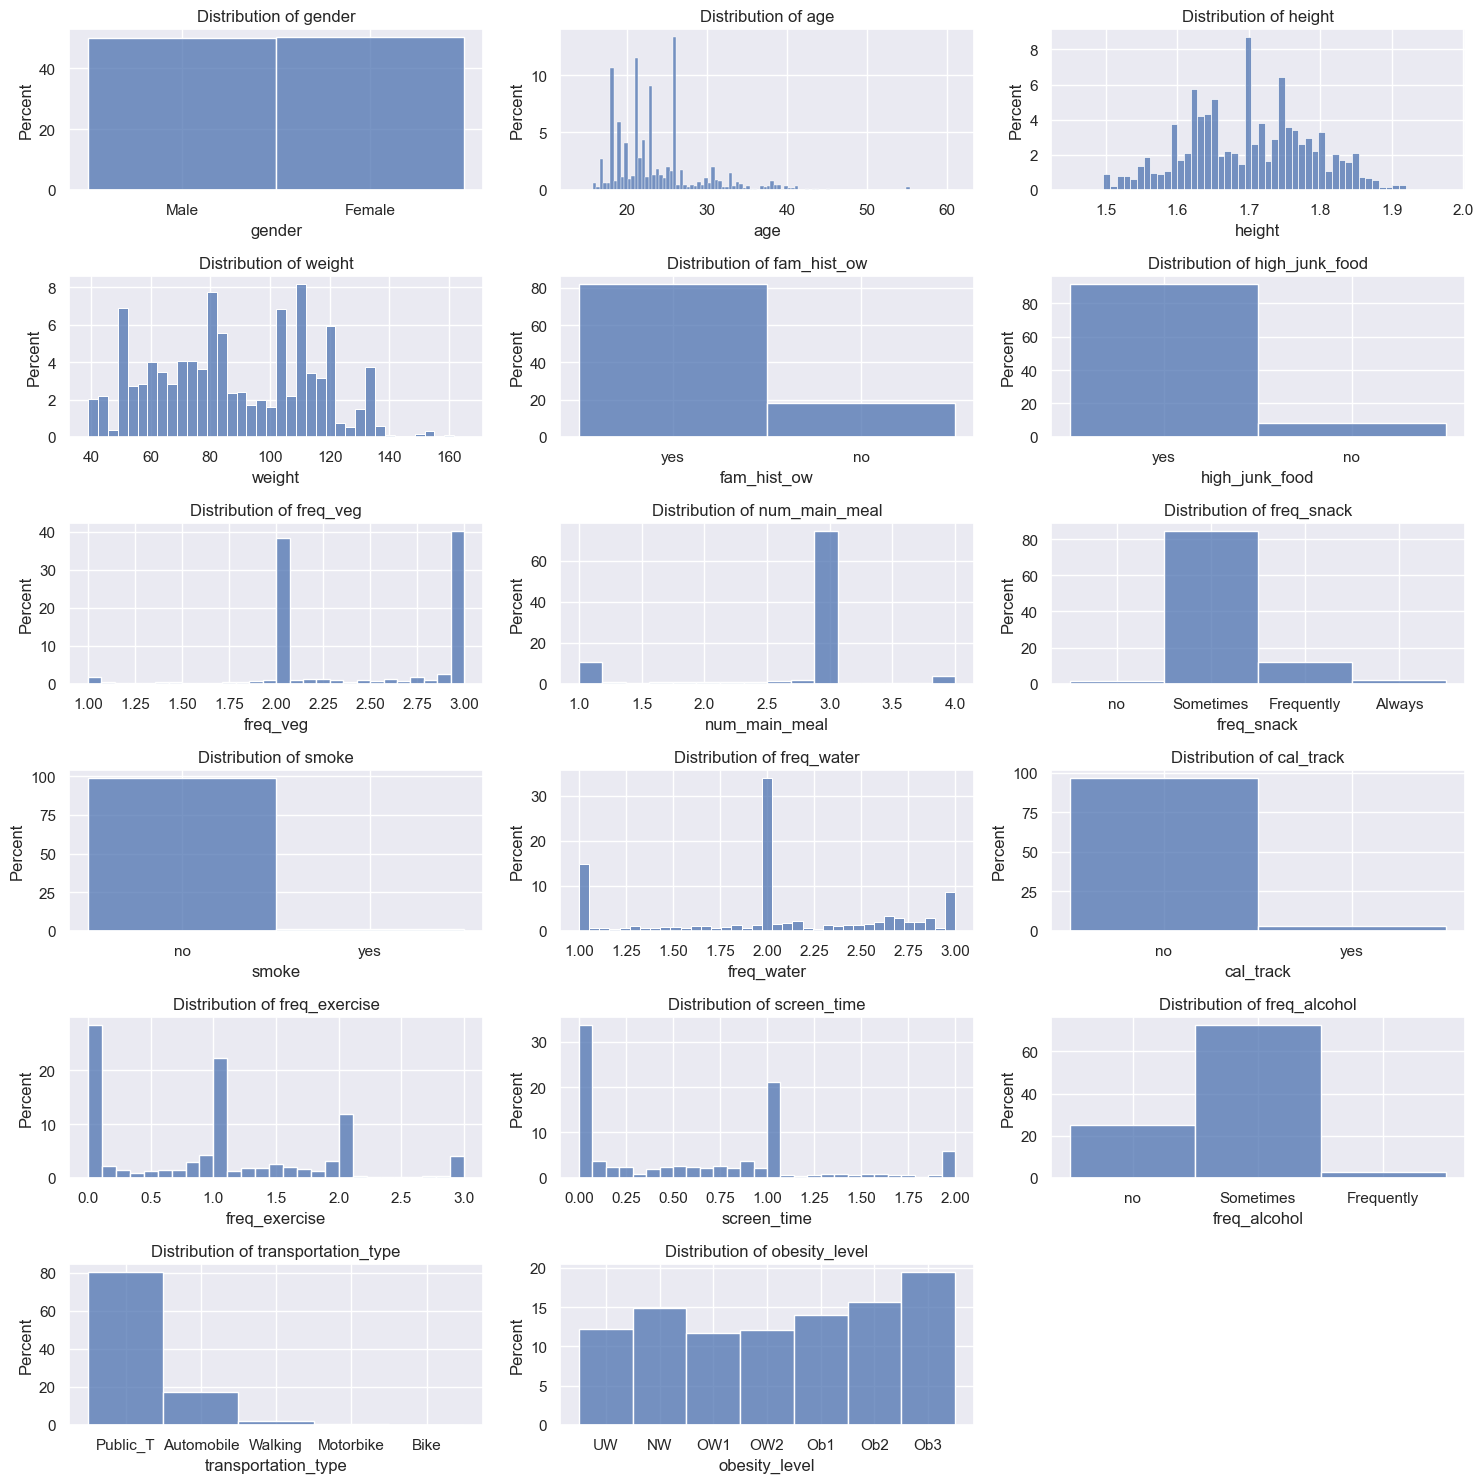

In [180]:
# Histogram plots
sns.set_theme()
plt.figure(figsize=(15,15))
i=1
for col in train.columns:
    if col=='id': continue
    plt.subplot(6,3,i)
    sns.histplot(x=col, data=train,kde=False,stat='percent')  # Replace 'feature_name' with an actual feature from the data
    plt.title(f'Distribution of {col}')
    i+=1
    plt.tight_layout()

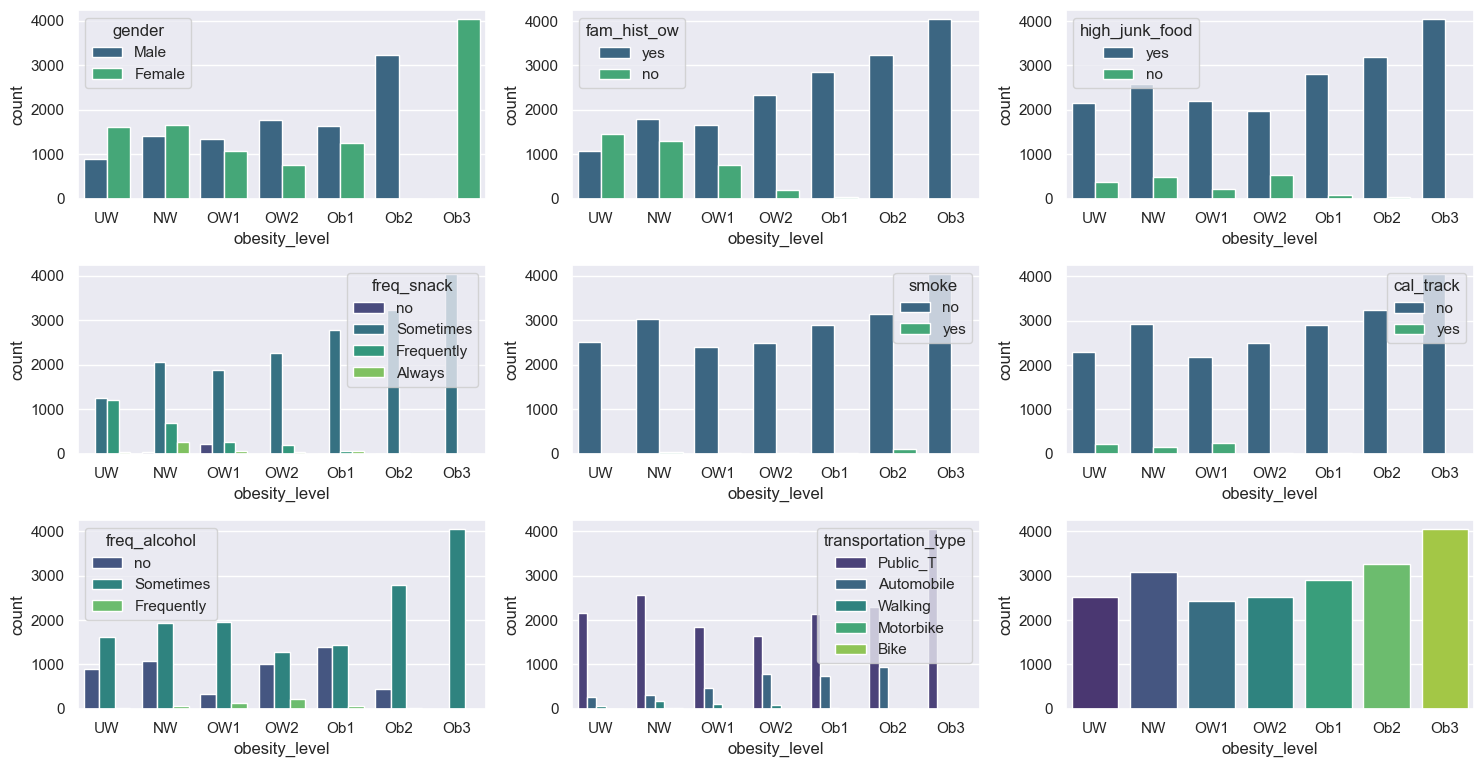

In [179]:
# Counts plots for categorical data with obesity_level hue
sns.set_theme()
plt.figure(figsize=(15,15))
i=1
for col in categorical_columns:
    if col=='id': continue
    plt.subplot(6,3,i)
    sns.countplot(x='obesity_level', hue=col, data=train, palette='viridis')  # Replace 'feature_name' with an actual feature from the data
    i+=1
    plt.tight_layout()

In [ ]:
# Set general plot style
sns.set(style='whitegrid')

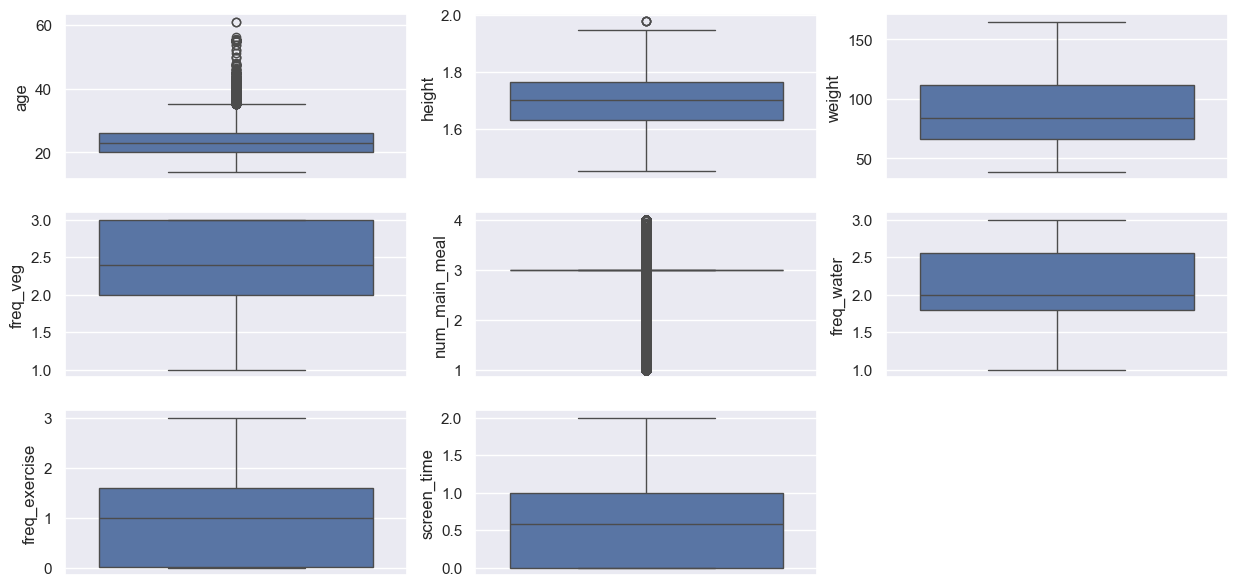

In [202]:
# Box plots for numerical coluns
i = itertools.count()
next(i)
plt.figure(figsize=(15,15))
for col in numerical_columns:
    if col=='id': continue
    plt.subplot(6,3,next(i))
    sns.boxplot(train[col])
    # plt.title(f'{col}')
    plt.tight_layout
    

In [22]:
# Feature Engineering: add BMI column
# Assuming that height is in meters and weight is in KG we have:

train['BMI'] = train['weight'] / ((train['height']*100.0) ** 2)
test['BMI'] = test['weight'] / ((test['height']*100.0) ** 2)
original_data['BMI'] = original_data['weight'] / ((original_data['height']*100.0) ** 2)

In [23]:
# Encode categorical columns

# Make copies of the original dataframes
train_encoded = train.copy()
test_encoded = test.copy()
original_data_encoded = original_data.copy()

# Apply Label Encoding to each ordinal categorical column
label_encoders = {}
label_encoders['freq_snack']={'no':0,'Sometimes':1, 'Frequently':2,'Always':3}
label_encoders['freq_alcohol']={'no':0,'Sometimes':1, 'Frequently':2,'Always':3}
label_encoders['obesity_level']={'UW':0,'NW':1,'OW1':2,'OW2':3,'Ob1':4, 'Ob2':5, 'Ob3':6}
for col,le in label_encoders.items():
    train_encoded[col]=train_encoded[col].map(lambda x:le[x])
    # test_encoded[col]=test_encoded[col].map(lambda x:le[x])
    # original_data_encoded[col]=original_data_encoded[col].map(lambda x:le[x])
    
le = LabelEncoder()
for col in non_ordinal_cat_columns:
    train_encoded[col]=le.fit_transform(train_encoded[col])
    # test_encoded[col]=le.fit_transform(test[col])
    # original_data_encoded[col]=le.fit_transform(original_data[col])

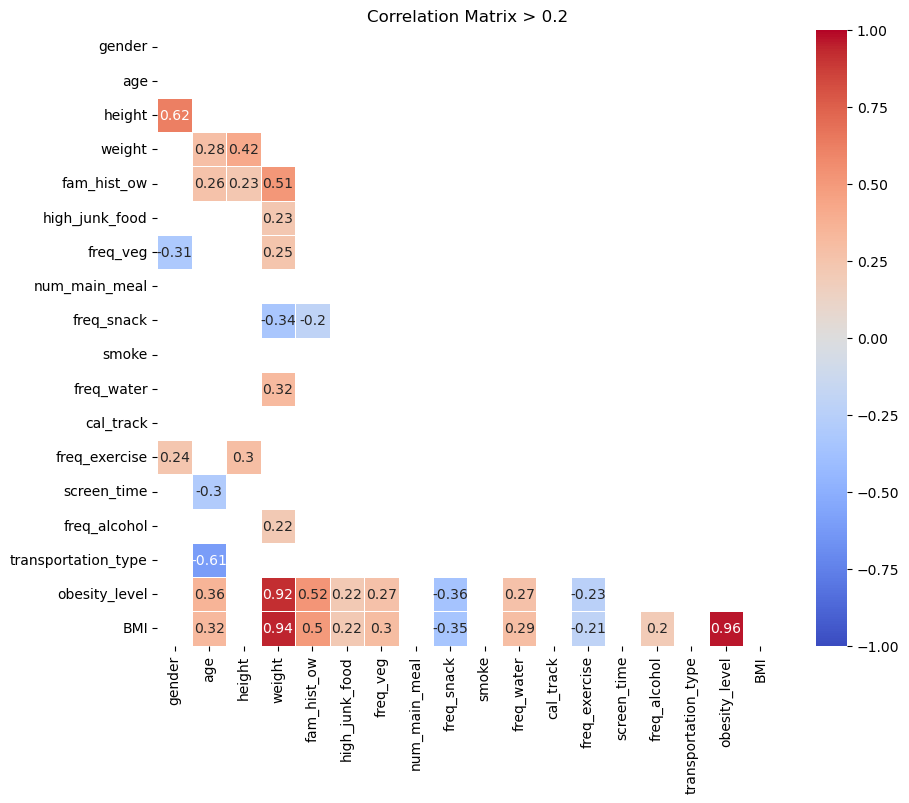

In [24]:
# Correlation matrix

correlation_matrix = train_encoded.corr()
corr_above_threshold = correlation_matrix[np.abs(correlation_matrix)>0.2]
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_above_threshold, annot=True, mask=mask , cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix > 0.2')
plt.show()

Observtions:

**Historgrams**:
- There is roughly 50:50 mix of males and females. So, no gener bias in the collected data.
- Age distribution is highly skewed toward younger ages in the range of the study (14 to 60). Older people are less represented
- People with overwight family history are 5 times more than those without
- Junk food consuption is 10 more likely to be yes than no in the training data set
- The vast majority responded with  2, or 3 for vegetable consumption with roughly same number of people
- All participants replied with NO for somking!!
- The majority did not track calories
- Roughly uniform distribution of obesity types
- The vast majority answered NO for smoking which is interesting. Lets look at the basline statistics later. We need more data to invistigate but for now we can remove it since it is not informative.
- The vast majority answered NO for smoking which is interesting. Lets look at the basline statistics later. We need more data to invistigate
- The vast majority answered sometimes for snacking so we might just remove it since it is not informative
- The vast majority answered sometimes for cal_track so we might just remove it since it is not informative
  
**Countplot**:
- There is a stron correlation between gender and extreme obesity (types II & II): type II only males while type III all females
- There is a clear trend between family history of overweight and obesity level. People who answered no for fam hist of ow are moslty UW or NW with few reported as OV1. However, do not forget that the majority ansered YES for fam_hist_ow and the baseline dist of obesity_level shows an upward trend for higher level of obesity
- Slight postitive correlation between freq_high_calories and obesity

**Correlation**
- negative correlation (-0.3) between age and screen time. Older people are spending less screen time than younger people as expected
- Positive correlation (0.3) between hight and freq_exercise. Taller people are more likely to exercise. Could it be that becuase of the cultural bias towards taller people attractivenss taller people are more insentivised to stay in shape or that taller people are more athletic and more inclinded or more need for exercise for pure physicologial reasons?
- Postitive correlation (0.32) between freq_water and weight. It could be that the higher the weight the higher the need for water or the higher the frequencey of drinking water the more weight due water retention.
- Positive correlation (0.25) between freq_vegetables and weight. Surprisingly, the higher the weight the hihger the consumptino of vegetiables
- The relatively high prositive correlation (0.42) between hight and weight is no surprise since the body has more mass the taller it gets.
- Older people are more likely to have higher weight, no surprize here since we are considering people ages 14 and above so we know that they gain weight as the age.
- Gender and hight are positivly correlated (0.62). Naturally, men are taller on average
- Transportation type is correlated with age. at younger age people use the T and then they have theier own cars as they mature
- Family history is slighlyt correlated with obesity level


### Feature Selection

Based on the information from the histogram and correlation plots:

- **Strong correlations (suggesting columns to keep):**
  - **Weight**: Very high correlation with `obesity_level` (0.921), making it a crucial predictor.
  - **Family History of Overweight (`fam_hist_ow`)**: Moderate positive correlation with `obesity_level` (0.522), indicating its importance in predicting obesity.
  - **Age**: Shows a moderate positive correlation with `obesity_level` (0.356), suggesting it's a relevant predictor.
  - **Frequency of Water Consumption (`freq_water`)**: Moderate correlation (0.273), highlighting a potential link between hydration habits and obesity.
  - **Frequency of Vegetable Consumption (`freq_veg`)**: Similarly, this has a moderate correlation (0.273), suggesting a dietary impact on obesity levels.
  - **Frequency of Snacks (`freq_snack`)**: Negative correlation (-0.364), which is suprising since we would expect that more frequent snacking might contribute to higher obesity levels not the opposite as indigated by the negative sign.
  - **Frequency of Exercise (`freq_exercise`)**: Negative correlation (-0.235), indicating that higher exercise frequency is generally associated with lower obesity levels.

- **Moderate to Weak correlations (consider keeping with caution):**
  - **Height**: Shows some correlation with `weight` and the target but less direct impact. We will keep it just in case. 
  - **Screen Time (`screen_time`)**: Though weakly negatively correlated, it could still provide meaningful context in lifestyle-related modeling.

- **Low-impact or Redundant Features (potentially drop or further investigate):**
  - **Smoking (`smoke`)**: Low correlation with `obesity_level`, suggesting minimal impact in predicting obesity in this dataset.
  - **Caloric Tracking (`cal_track`)**: Weakly correlated (-0.185), indicating limited direct influence.
  - **Transportation Type (`transportation_type`)**: No significant correlation.
  - **Frequency of Alcohol Consumption (`freq_alcohol`)**: Low correlation with the target, implying it may not significantly influence obesity predictions.

### Conclusion

The feature selection process aims to retain features with strong predictive power while considering removing or transforming those with weaker or redundant correlations. This approach ensures the model remains both interpretable and effective, focusing on the most relevant aspects of the data related to obesity levels. Moreover, there are no strong colinearities (>0.8) between features so no need to drop features due to multicolinearity.


In [11]:
# List of features with strong and moderate correlations with the target variable 'obesity_level'
features = [
    # Strong correlations
    'BMI',               # Correlation: 0.96
    'fam_hist_ow',          # Correlation: 0.522

    # Moderate correlations
    'age',                  # Correlation: 0.356
    'freq_water',           # Correlation: 0.273
    'freq_veg',             # Correlation: 0.273
    'freq_snack',           # Correlation: -0.364
    'freq_exercise',        # Correlation: -0.235
    'height'                # Correlation: 0.150
]

In [25]:
# Scaling numerical features
scaler = StandardScaler()
numerical_features = numerical_columns+['BMI']
train_encoded[numerical_features] = scaler.fit_transform(train_encoded[numerical_features])

In [26]:
# Splitting into training and dev sets

X_train = train_encoded.drop(columns=['obesity_level'])
y_train = train_encoded[['obesity_level']]
X_test = test_encoded.drop(columns=['obesity_level'])
X_original = original_data_encoded.drop(columns=['obesity_level'])

X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [27]:
with open('data/X_train_X_train_y_train_y_dev.pkl','wb') as f:
    pickle.dump((X_train, X_dev, y_train, y_dev),f)

# 2. Model Building

## Modeling Approach

### Objective
The goal is to predict `obesity_level` using selected features through a series of machine learning models. Our approach involves data preprocessing, model training, evaluation, and optimization.

### Model Selection
We will use three models with distinct strengths:

- **Logistic Regression**: 
  - A baseline model that is simple, interpretable, and useful for understanding feature impacts.

- **Random Forest Classifier**: 
  - An ensemble method that handles non-linear relationships, reduces overfitting, and highlights feature importance.

- **XGBoost Classifier**: 
  - A high-performance gradient boosting model that excels with complex relationships and offers extensive tuning capabilities.

### Evaluation Metrics
Models will be evaluated using Accuracy, Precision, Recall, F1-Score, and Confusion Matrix to assess overall performance and class prediction quality.

### Hyperparameter Tuning
The best-performing model will undergo tuning to optimize its performance further using techniques like Grid Search or Random Search.

### Conclusion
This approach combines interpretability, robustness, and power from different models to find the most effective solution for predicting obesity levels.


In [46]:
# Define the updated models dictionary with a wide range of models, including XGBoost
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(
        use_label_encoder=False, 
        eval_metric='logloss',
        n_estimators=300,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    'LightGBM': LGBMClassifier(
        boosting_type='gbdt',
        num_leaves=31,
        max_depth=-1,
        learning_rate=0.1,
        n_estimators=300,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    'CatBoost': CatBoostClassifier(
        iterations=300,
        learning_rate=0.1,
        depth=6,
        loss_function='MultiClass',
        eval_metric='Accuracy',
        random_seed=42,
        verbose=0
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ),
    'Extra Trees': ExtraTreesClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42
    ),
    'AdaBoost': AdaBoostClassifier(
        n_estimators=300,
        learning_rate=0.1,
        random_state=42
    )
}

In [47]:
# Training and evaluating each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_pred_train = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    
    # Predict on the development set
    y_pred_dev = model.predict(X_dev)
    dev_accuracy = accuracy_score(y_dev, y_pred_dev)
    
    # Print training and development set accuracy
    print(f"{model_name} Training Set Accuracy: {train_accuracy:.4f}")
    print(f"{model_name} Development Set Accuracy: {dev_accuracy:.4f}")
    
    # Print classification report and confusion matrix for the development set
    print("Classification Report:")
    print(classification_report(y_dev, y_pred_dev))
    print("Confusion Matrix:")
    print(confusion_matrix(y_dev, y_pred_dev))
    print("\n" + "="*50 + "\n")

Training Logistic Regression...
Logistic Regression Training Set Accuracy: 0.8621
Logistic Regression Development Set Accuracy: 0.8658
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       524
           1       0.86      0.81      0.83       626
           2       0.70      0.71      0.71       484
           3       0.72      0.68      0.70       514
           4       0.83      0.85      0.84       543
           5       0.96      0.97      0.96       657
           6       1.00      1.00      1.00       804

    accuracy                           0.87      4152
   macro avg       0.85      0.85      0.85      4152
weighted avg       0.86      0.87      0.86      4152

Confusion Matrix:
[[494  28   1   1   0   0   0]
 [ 61 505  58   2   0   0   0]
 [  1  46 346  83   8   0   0]
 [  0  10  77 350  73   4   0]
 [  2   0  10  46 459  24   2]
 [  0   0   0   4  14 638   1]
 [  0   0   0   0   0   1 803]]


Trainin

**Model selection summmary**

The LogisticRegression model (accuracy 0.85) serves well as the baseline model.
XGBoost (Accuracy: 0.8909) has the best perfromrance in all measures, especially F1-score where the baseline model is particularly weak. 
Lets finetune XGBosst model further for better perfomance. We will use GridSearchCV to perform hyperparameter tuning on XGBoost to find the optimal parameters that improve the model's performance. 

## Hyperparameter Tuning for 


In [49]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for fine-tuning
param_grid = {
    'max_depth': [3, 5, 7],                 # Control tree depth
    'learning_rate': [0.01, 0.05, 0.1],     # Control the learning rate
    'n_estimators': [100, 200, 300],        # Number of boosting rounds
    'subsample': [0.6, 0.8, 1.0],           # Fraction of samples used per tree
    'colsample_bytree': [0.6, 0.8, 1.0],    # Fraction of features used per tree
    'reg_alpha': [0, 0.5, 1],               # L1 regularization
    'reg_lambda': [1, 1.5, 2]               # L2 regularization
}

# Initialize the XGBoost model
xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

# Set up the Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,               # 3-fold cross-validation
    verbose=1,
    n_jobs=-1           # Use all available cores
)

# Fit Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 2, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9085


In [29]:
# Retraining the XGBoost model with the best parameters
xgb_best = XGBClassifier(
    colsample_bytree=0.6,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=300,
    reg_alpha=1,
    reg_lambda=2,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train the model on the training data
xgb_best.fit(X_train, y_train)

# Predict on the training set
y_pred_train = xgb_best.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

# Predict on the development set
y_pred_dev = xgb_best.predict(X_dev)

# Evaluate the model on the development set
dev_accuracy = accuracy_score(y_dev, y_pred_dev)

# Print the accuracy and detailed evaluation metrics
print(f"Training Set Accuracy: {dev_accuracy:.4f}")
print(f"Development Set Accuracy: {dev_accuracy:.4f}")
print("Development Set Classification Report:")
print(classification_report(y_dev, y_pred_dev))
print("Development Set Confusion Matrix:")
print(confusion_matrix(y_dev, y_pred_dev))

Training Set Accuracy: 0.9078
Development Set Accuracy: 0.9078
Development Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       524
           1       0.88      0.90      0.89       626
           2       0.79      0.80      0.79       484
           3       0.81      0.81      0.81       514
           4       0.89      0.88      0.88       543
           5       0.98      0.97      0.98       657
           6       1.00      1.00      1.00       804

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152

Development Set Confusion Matrix:
[[485  35   2   2   0   0   0]
 [ 24 561  36   5   0   0   0]
 [  1  33 388  51  11   0   0]
 [  0   7  53 416  35   3   0]
 [  2   1  13  38 477  11   1]
 [  0   0   0   2  13 640   2]
 [  0   0   1   0   0   1 802]]


#

# Results and Insights

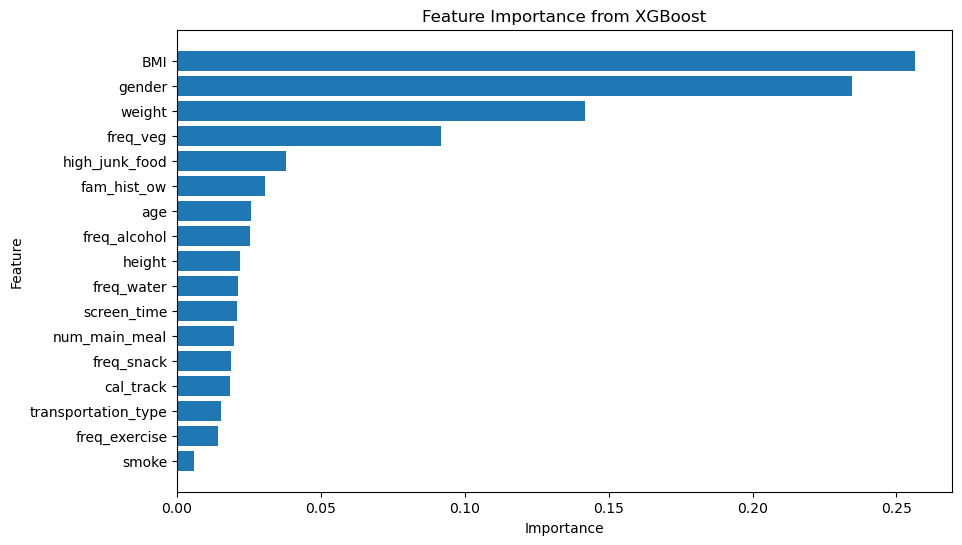

In [30]:
# Extract feature importances
feature_importances = xgb_best.feature_importances_
features = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost')
plt.gca().invert_yaxis()
plt.show()